# <center> Binary Classification using SVM </center>

___

SVM Model objective is to find the maximum margin classifier. The maximum margin classifier helps to reduces the hypothesis space, effect of high dimensionality and computation. 

The points which maximum margin classifier touches are called support vectors. These vectors alone are enough to classify all other points.

___


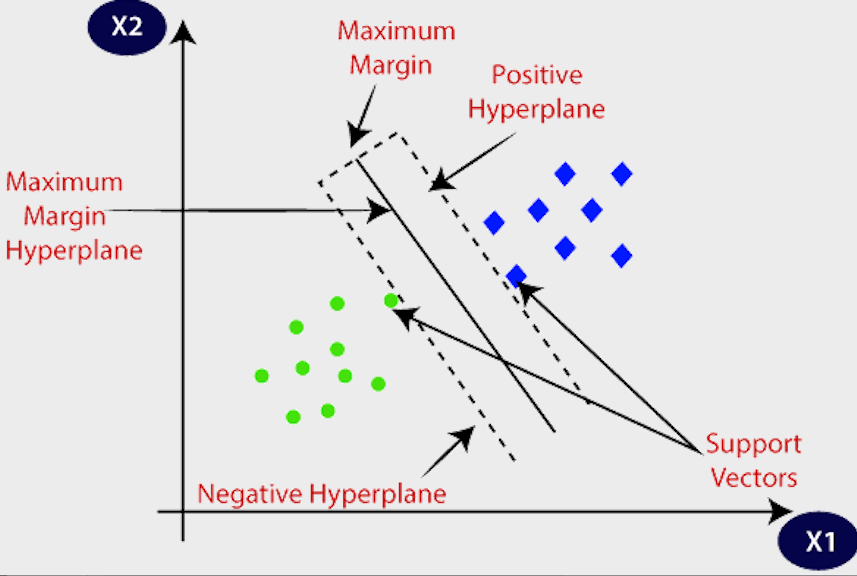

In [1]:
from IPython.display import Image
Image(filename ='/home/datasets/lab/Batch85/MachineLearning/SVM/img/svm2.png',width=500)

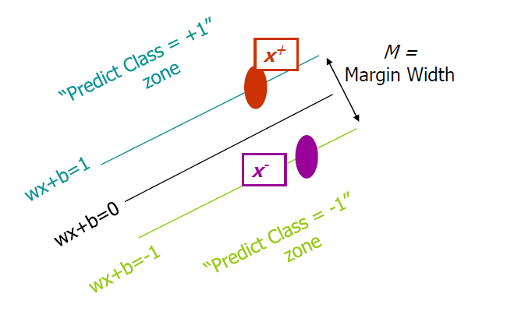

In [2]:
Image(filename ='/home/datasets/lab/Batch85/MachineLearning/SVM/img/svm1.png',width=500)

## Problem Statement - 
* To predict whether the person will survive or not based on the diagonostic factors influencing Hepatitis

### Dataset: _Hepatitis_ 
* This dataset contains occurrences of hepatitis in people.

The dataset is obtained from the machine learning repository at UCI. It includes 155 records in two different classes which are die in 32 cases and live in 123 cases. The dataset includes 20 attributes (14 binary and 6 numerical attributes).

### **Attribute information:**

1. **target**: DIE (1), LIVE (2)
2. **age**: 10, 20, 30, 40, 50, 60, 70, 80
3. **gender**: male (1), female (2)

           ------ no = 2,   yes = 1 ------

4. **steroid**: no, yes 
5. **antivirals**: no, yes 
6. **fatique**: no, yes 
7. **malaise**: no, yes 
8. **anorexia**: no, yes 
9. **liverBig**: no, yes 
10. **liverFirm**: no, yes 
11. **spleen**: no, yes 
12. **spiders**: no, yes
13. **ascites**: no, yes 
14. **varices**: no, yes
15. **histology**: no, yes


16. **bilirubin**: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 -- 
17. **alk**: 33, 80, 120, 160, 200, 250 ---
18. **sgot**: 13, 100, 200, 300, 400, 500, ---
19. **albu**: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0, --- 
20. **protime**: 10, 20, 30, 40, 50, 60, 70, 80, 90, --- 

  * NA's are represented with "?"

### Identify Right Error Metrics

    Based on the business have to identify the right error metrics.

##### Confusion Matrix

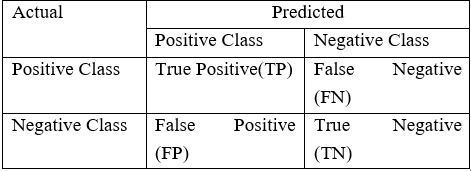

In [3]:
Image(filename ='/home/datasets/lab/Batch85/MachineLearning/SVM/img/Confusion_Matrix.png',width=500)

### Loading the required libraries

import required libraries

In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

import seaborn as sns                     # Seaborn is a library for making statistical graphics in Python
import matplotlib.pyplot as plt           # Plotting library for Python
%matplotlib inline

In [5]:
# Code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

##### 1. Read the HEPATITIS dataset

In [6]:
## Read "hepatitis.csv" using pandas
data = pd.read_csv("/home/datasets/lab/Batch85/MachineLearning/SVM/hepatitis.csv", na_values="?")

##### 2. Check the dimensions (rows and columns)

In [7]:
data.shape

(155, 21)

##### 3. Check the datatype of each variable

In [8]:
data.dtypes

ID              int64
target          int64
age             int64
gender          int64
steroid       float64
antivirals      int64
fatigue       float64
malaise       float64
anorexia      float64
liverBig      float64
liverFirm     float64
spleen        float64
spiders       float64
ascites       float64
varices       float64
bili          float64
alk           float64
sgot          float64
albu          float64
protime       float64
histology       int64
dtype: object

## _Exploratory Data Analysis_

##### 4. Check the top 5 rows and observe the data

In [9]:
data.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,2,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,2,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,2,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


##### 5. Check basic summary statistics of the data

In [10]:
data.describe()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,...,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,78.000000,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,...,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,39.500000,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,78.000000,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,116.500000,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,155.000000,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


##### 6. Check the number of unique levels in each attribute

In [11]:
data.nunique()

ID            155
target          2
age            49
gender          2
steroid         2
antivirals      2
fatigue         2
malaise         2
anorexia        2
liverBig        2
liverFirm       2
spleen          2
spiders         2
ascites         2
varices         2
bili           34
alk            83
sgot           84
albu           29
protime        44
histology       2
dtype: int64

### Target attribute distribution

##### 7. Check for value counts in target variable

In [12]:
data.target.value_counts()

2    123
1     32
Name: target, dtype: int64

##### 8. Check for distribution of values in target variable

In [13]:
data.target.value_counts(normalize=True)*100

2    79.354839
1    20.645161
Name: target, dtype: float64

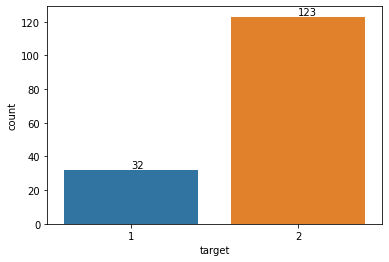

In [14]:
y_count=sns.countplot(x='target',data=data)        
# Shows the count of observations in each categorical bin using bars

for p in y_count.patches:
    height = p.get_height()
    # Add text to the axes
    y_count.text(p.get_x()+p.get_width()/2, height + 1, height)
# The y_count.text method takes an x position, a y position and a string

### Uni-variate Analysis

##### Plotting Categorical Data - Barplot

In [15]:
def barplot(x,df):
    bar_plot1 = sns.countplot(x=x, data=df)
    for p in bar_plot1.patches:
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 1, height)

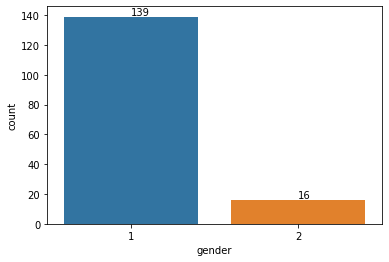

In [16]:
barplot("gender",data)
# Observation: There are only 16 females in the dataset

#### Plotting Numerical Data - Histogram

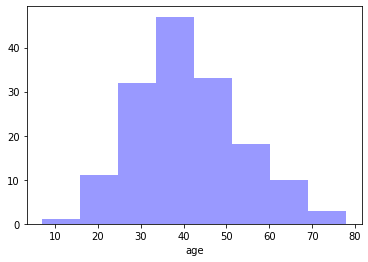

In [17]:
# Age Distribution in the data (distplot is used to visualize the distribution of the data)
sns.distplot(data["age"],bins=8,kde=False,color = 'blue') # Bins can be changed
plt.show()
# Observation: The dataset has more middle-aged people ranging between 30-50 years

### Bi-variate Analysis

#### Boxplot for Numeric Vs Categorical attributes

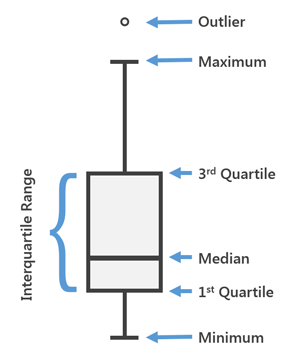

In [18]:
Image("/home/datasets/lab/Batch85/MachineLearning/SVM/img/boxplot.png")

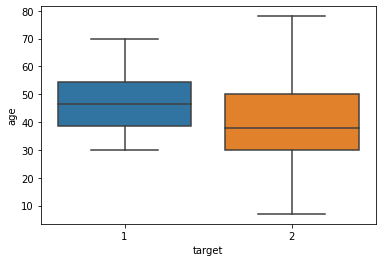

In [19]:
# Distribution of age with respect to the target
sns.boxplot(x="target",y="age", data=data)
plt.show()
# Observation: Median age for target=1 is higher than median age for target=2

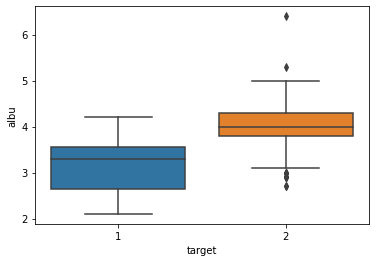

In [20]:
sns.boxplot(x="target",y="albu", data=data)
plt.show()
# A low albumin level in patients with hepatitis C can be a sign of cirrhosis (advanced liver disease). 
# Observation: Low albumin values for target=1

In [21]:
# Is fatigue an important factor among the patients who died?
data[data.target == 1].fatigue.value_counts(normalize=True)*100
# Can you visualize this?

1.0    93.75
2.0     6.25
Name: fatigue, dtype: float64

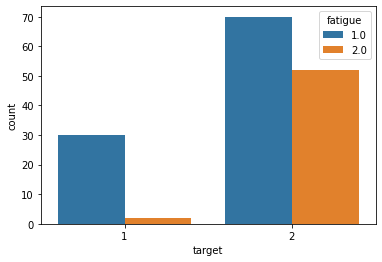

In [22]:
sns.countplot(x='target',hue="fatigue",data=data) 
plt.show()

In [23]:
# Is gender an important factor among the patients who died?
data[data.target == 1].gender.value_counts(normalize=True)*100
# Can you visualize this?

1    100.0
Name: gender, dtype: float64

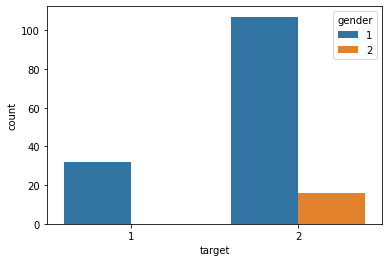

In [24]:
sns.countplot(x='target',hue="gender",data=data) 
plt.show()

## _Data Pre-processing_

##### 9. Drop column(s) which are not significant

In [25]:
data.drop(["ID"], axis = 1, inplace=True)

##### 10. Check for top 5 rows

In [26]:
data.head()

,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


##### 11. Identify the Categorical Columns and store them in a variable cat_cols and numerical into num_cols

In [27]:
num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
cat_cols = ['gender', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 
            'liverFirm', 'spleen', 'spiders', 'ascites', 'varices', 'histology']

##### 12. Convert all the categorical columns to appropriate data type 

In [28]:
data[cat_cols] = data[cat_cols].astype('category')

In [29]:
data.dtypes

target           int64
age              int64
gender        category
steroid       category
antivirals    category
fatigue       category
malaise       category
anorexia      category
liverBig      category
liverFirm     category
spleen        category
spiders       category
ascites       category
varices       category
bili           float64
alk            float64
sgot           float64
albu           float64
protime        float64
histology     category
dtype: object

##### 13. Check for null values

In [30]:
data.isna().sum()

target         0
age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig      10
liverFirm     11
spleen         5
spiders        5
ascites        5
varices        5
bili           6
alk           29
sgot           4
albu          16
protime       67
histology      0
dtype: int64

##### 14. Split the data into X and y

In [31]:
X = data.drop(["target"], axis = 1)

In [32]:
y = data["target"]

In [33]:
print(X.shape, y.shape)

(155, 19) (155,)


##### 15. Split the data into X_train, X_test, y_train, y_test with test_size = 0.20

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123,stratify=y)

##### 16. Print the shape of X_train, X_test, y_train, y_test

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 19)
(31, 19)
(124,)
(31,)


##### 17. Check for distribution of target values in y_train

In [36]:
print(y_train.value_counts())

2    98
1    26
Name: target, dtype: int64


In [37]:
print(y_train.value_counts(normalize=True)*100)

2    79.032258
1    20.967742
Name: target, dtype: float64


##### 18. Check for distribution of target values in y_test

In [38]:
print(y_test.value_counts(normalize=True)*100)

2    80.645161
1    19.354839
Name: target, dtype: float64


### Handling Missing Data

##### 19. Check null values in train and test

In [39]:
# null values in train
X_train.isna().sum()

age            0
gender         0
steroid        0
antivirals     0
fatigue        0
malaise        0
anorexia       0
liverBig       7
liverFirm      8
spleen         2
spiders        2
ascites        2
varices        2
bili           4
alk           22
sgot           3
albu          11
protime       51
histology      0
dtype: int64

In [40]:
# null values in test
X_test.isna().sum()

age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig       3
liverFirm      3
spleen         3
spiders        3
ascites        3
varices        3
bili           2
alk            7
sgot           1
albu           5
protime       16
histology      0
dtype: int64

### Missing value Imputation

##### 20. Impute the Categorical Columns with mode and Numerical columns with median

In [41]:
df_cat_train = X_train[cat_cols]
df_cat_test = X_test[cat_cols]

In [42]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(df_cat_train)

SimpleImputer(strategy='most_frequent')

In [43]:
df_cat_train = pd.DataFrame(cat_imputer.transform(df_cat_train), columns=cat_cols)

In [44]:
df_cat_test = pd.DataFrame(cat_imputer.transform(df_cat_test), columns=cat_cols)

In [45]:
df_num_train = X_train[num_cols]
df_num_test = X_test[num_cols]

In [46]:
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(df_num_train[num_cols])

SimpleImputer(strategy='median')

In [47]:
df_num_train = pd.DataFrame (num_imputer.transform(df_num_train), columns= num_cols)

In [48]:
df_num_test =  pd.DataFrame(num_imputer.transform(df_num_test), columns=num_cols)

In [49]:
# Combine numeric and categorical in train
X_train = pd.concat([df_num_train, df_cat_train], axis = 1)

# Combine numeric and categorical in test
X_test = pd.concat([df_num_test, df_cat_test], axis = 1)

In [50]:
X_train.isna().sum()

age           0
bili          0
alk           0
sgot          0
albu          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

In [51]:
X_test.isna().sum()

age           0
bili          0
alk           0
sgot          0
albu          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

### Encoding Categorical to Numeric -  Dummification

    'pandas.get_dummies' To convert convert categorical variable into dummy/indicator variables

#### 21. Dummify the Categorical columns

Creating dummy variables -

    If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category

In [52]:
## Convert Categorical Columns to Dummies
# Train
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)

# Test
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [53]:
X_train.columns

Index(['age', 'bili', 'alk', 'sgot', 'albu', 'protime', 'gender_2.0',
       'steroid_2.0', 'antivirals_2.0', 'fatigue_2.0', 'malaise_2.0',
       'anorexia_2.0', 'liverBig_2.0', 'liverFirm_2.0', 'spleen_2.0',
       'spiders_2.0', 'ascites_2.0', 'varices_2.0', 'histology_2.0'],
      dtype='object')

In [54]:
X_test.columns

Index(['age', 'bili', 'alk', 'sgot', 'albu', 'protime', 'gender_2.0',
       'steroid_2.0', 'antivirals_2.0', 'fatigue_2.0', 'malaise_2.0',
       'anorexia_2.0', 'liverBig_2.0', 'liverFirm_2.0', 'spleen_2.0',
       'spiders_2.0', 'ascites_2.0', 'varices_2.0', 'histology_2.0'],
      dtype='object')

#### 22. Scale the numeric attributes ["age", "bili", "alk", "sgot", "albu", "protime"]

In [55]:
#num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
scaler = StandardScaler()

scaler.fit(X_train[num_cols])

# scale on train
X_train[num_cols] = scaler.transform(X_train[num_cols])

# scale on test
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [56]:
X_train.head()

,age,bili,alk,sgot,albu,protime,gender_2.0,steroid_2.0,antivirals_2.0,fatigue_2.0,malaise_2.0,anorexia_2.0,liverBig_2.0,liverFirm_2.0,spleen_2.0,spiders_2.0,ascites_2.0,varices_2.0,histology_2.0
0,1.432888,0.057593,1.494006,-0.312494,-1.753330,-1.545266,1,1,1,0,1,1,1,0,1,0,1,1,0
1,1.111734,2.376273,0.371980,-0.636906,-0.522400,-1.113288,0,0,1,0,0,1,1,1,0,1,0,1,1
2,-0.012302,-0.684384,-1.260059,-0.144280,0.554663,0.367778,0,0,0,0,0,0,0,0,1,1,1,1,1
3,-1.377204,-0.035154,1.881616,0.828956,0.400797,1.787134,0,1,1,0,0,0,1,1,0,1,1,1,0
4,-0.815186,-0.591637,-1.015253,-0.516753,0.093064,-0.557888,0,1,0,1,1,1,1,1,1,1,1,1,0


In [57]:
X_test.head()

,age,bili,alk,sgot,albu,protime,gender_2.0,steroid_2.0,antivirals_2.0,fatigue_2.0,malaise_2.0,anorexia_2.0,liverBig_2.0,liverFirm_2.0,spleen_2.0,spiders_2.0,ascites_2.0,varices_2.0,histology_2.0
0,2.155483,0.150340,1.575608,-0.144280,-1.445597,-0.064199,1,0,1,0,0,1,1,1,1,1,1,1,0
1,0.148274,-0.313396,-0.342037,-0.805119,0.246930,2.404245,0,0,1,1,1,1,1,1,1,1,1,1,0
2,1.111734,-0.313396,1.085997,1.730101,-0.368534,0.367778,0,0,0,1,1,1,0,0,1,1,1,1,1
3,-1.056051,-0.498890,-0.342037,-0.516753,0.554663,-0.064199,0,1,1,1,1,1,1,1,1,1,1,1,0
4,-0.092591,-0.313396,-0.342037,-0.733028,0.246930,-0.064199,0,1,1,1,1,1,1,1,1,1,1,1,0


## MODEL BUILDING

### A. SVM (Linear  and RBF Models)

In [58]:
from sklearn.svm import SVC

In [71]:
# Create a SVC classifier using a linear kernel
linear_svm = SVC(kernel='linear', C=0.1)

In [72]:
# Train the classifier
linear_svm.fit(X=X_train, y= y_train)

SVC(C=0.1, kernel='linear')

In [73]:
## Predict
train_predictions = linear_svm.predict(X_train)
test_predictions = linear_svm.predict(X_test)

### Train data accuracy

print("TRAIN Conf Matrix : \n", confusion_matrix(y_train, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))


### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("TEST Conf Matrix : \n", confusion_matrix(y_test, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))


TRAIN Conf Matrix : 
 [[16 10]
 [ 4 94]]

TRAIN DATA ACCURACY 0.8870967741935484

Train data f1-score for class '1' 0.6956521739130435


--------------------------------------


TEST Conf Matrix : 
 [[ 3  3]
 [ 1 24]]

TEST DATA ACCURACY 0.8709677419354839

Test data f1-score for class '1' 0.6


####  Non Linear SVM (RBF)

Radial Basis Function is a commonly used kernel in SVC <br>

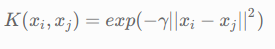

In [62]:
Image(filename ='/home/datasets/lab/Batch85/MachineLearning/SVM/img/rbf_kernel.png')

where <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow class="MJX-TeXAtom-ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow class="MJX-TeXAtom-ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow class="MJX-TeXAtom-ORD">
    <mi mathvariant="bold">x</mi>
      <sub>i</sub>
  </mrow>
  <mo>&#x2212;<!-- − --></mo>
  <mrow class="MJX-TeXAtom-ORD">
    <msup>
      <mi mathvariant="bold">x</mi>
      <sub>j</sub>
    </msup>
  </mrow>
  <mrow class="MJX-TeXAtom-ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msup>
    <mrow class="MJX-TeXAtom-ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <mrow class="MJX-TeXAtom-ORD">
      <sup>2</sup>
    </mrow>
  </msup>
</math>  is the Euclidean distance between two data points x<sub>i</sub> and x<sub>j</sub>

It is only important to know that an SVC classifier using an RBF kernel has two parameters: gamma and C.

<strong>Gamma:</strong>

- Gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad. When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points.


- When Gamma is low, SVM also considers far away points to decide decision boundary


- In other words, with low gamma, points far away from plausible separation line are considered in calculation for the separation line. Where as high gamma means the points close to plausible line are considered in calculation.

<strong>C:</strong>

- C is a Regularization parameter of the SVC learner and is the penalty for misclassifying a data point. When C is small, the classifier is okay with misclassified data points (high bias, low variance). When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards to avoid any misclassified data points (low bias, high variance).


- For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies some points.

<strong>Kernel Trick:</strong><br>


Imagine you have a two-dimensional non-linearly separable dataset, you would like to classify it using SVM. It looks like not possible because the data is not linearly separable. However, if we transform the two-dimensional data to a higher dimension, say, three-dimension or even ten-dimension, we would be able to find a hyperplane to separate the data.

</br>

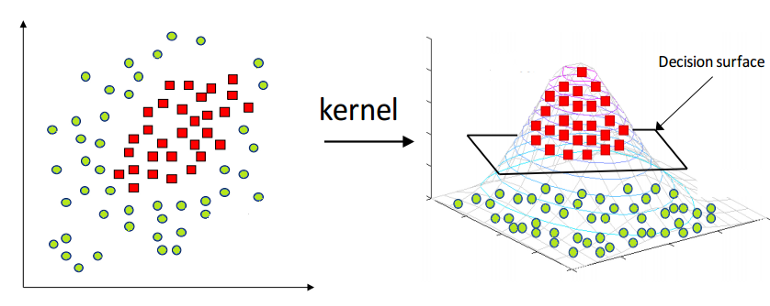

In [63]:
Image(filename ='/home/datasets/lab/Batch85/MachineLearning/SVM/img/kernel_trick.png')


The problem is, if we have a large dataset containing, say, millions of examples, the transformation will take a long time to run.<br>
To solve this problem, we actually only care about the result of the dot product (x<sub>i</sub>.x<sub>j</sub>)<br>
<br>If there is a function which could calculate the dot product and the result is the same as when we transform the data into higher dimension, it would be fantastic. This function is called a kernel function.<br>
<br>In essence, what the kernel trick does for us is to offer a more efficient and less expensive way to transform data into higher dimensions.

In [74]:
## Create an SVC object and print it to see the arguments
svc = SVC(kernel='rbf', gamma=0.01, C=1)
svc

SVC(C=1, gamma=0.01)

In [75]:
## Train the model
svc.fit(X=X_train, y=y_train)

SVC(C=1, gamma=0.01)

In [76]:
## Predict
train_predictions = svc.predict(X_train)
test_predictions = svc.predict(X_test)

### Train data accuracy

print("TRAIN Conf Matrix : \n", confusion_matrix(y_train, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))


### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("TEST Conf Matrix : \n", confusion_matrix(y_test, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))


TRAIN Conf Matrix : 
 [[ 5 21]
 [ 0 98]]

TRAIN DATA ACCURACY 0.8306451612903226

Train data f1-score for class '1' 0.32258064516129037


--------------------------------------


TEST Conf Matrix : 
 [[ 2  4]
 [ 0 25]]

TEST DATA ACCURACY 0.8709677419354839

Test data f1-score for class '1' 0.5


### SVM with Grid Search for Paramater Tuning

In [67]:
## Use Grid Search for parameter tuning

from sklearn.model_selection import GridSearchCV

svc_grid = SVC()
 
param_grid = { 
                'C': [0.001, 0.01, 0.1, 1, 10, 100 ],
                'gamma': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
                'kernel':['linear', 'rbf', 'poly' ]
             }

svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 5)

In [68]:
## Fit the grid search model
%time svc_cv_grid.fit(X=X_train, y=y_train)

CPU times: user 4.25 s, sys: 0 ns, total: 4.25 s
Wall time: 4.25 s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']})

In [69]:
# Get the best parameters
svc_cv_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [70]:
## Predict
train_predictions = svc_cv_grid.predict(X_train)
test_predictions = svc_cv_grid.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))


TRAIN DATA ACCURACY 0.9354838709677419

Train data f1-score for class '1' 0.8260869565217392


--------------------------------------


TEST DATA ACCURACY 0.8387096774193549

Test data f1-score for class '1' 0.4444444444444444


#### References:
* https://scikit-learn.org/stable/modules/svm.html
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html